In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats

In [2]:
df = pd.read_csv('~/Documents/manual_segmentation_results/twodim_integration.csv')

Fill NaN values with overall dataset mean. Might be better to remove/zero out?

In [3]:
print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

Filling 494 instances containing NaN values.


In [4]:
d = defaultdict()
for column in df.columns:
    d[column] = df[column].mean()

In [5]:
df.fillna(value=d, inplace=True)

Filter out extreme outliers (deviating more than 5 standard deviations from the mean).

In [6]:
numrows = df.shape[0]
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
print(f'Filtered out {numrows - df.shape[0]} instances.')

Filtered out 10 instances.


In [7]:
df

,dir,ecLF,ccLF,icLF,icMF,ccMF,ecMF,ccMF.aSD,ccMF.aMav,ccMF.aMiv,...,aLT.aMiv,cLT.aSD,cLT.aMav,cLT.aMiv,aMT.aSD,aMT.aMav,aMT.aMiv,iMT.aSD,iMT.aMav,iMT.aMiv
0,9162498,10.309331,8.144709,14.501633,6.999205,6.640225,9.619604,3.283681,17.371694,2.281547,...,0.157315,0.300185,2.537172,1.255173,0.790080,4.016020,-0.291157,1.304933,5.255333,0.369082
1,9211751,10.309331,15.191662,16.621515,7.148190,7.297603,10.706653,4.601649,32.960322,2.862862,...,0.691718,0.838033,3.723443,0.557083,0.952568,3.858740,-0.248562,1.416394,5.541718,0.278901
2,9230284,10.309331,7.350319,11.500595,7.435194,9.609401,9.448483,5.628505,19.783116,-0.147011,...,0.127009,0.336266,1.759496,0.421928,2.065990,8.052661,0.314785,1.971188,7.699920,0.273470
3,9156526,10.309331,11.342342,13.315398,5.601037,5.557040,7.992287,3.187193,16.734129,1.323284,...,0.237550,0.387579,2.806414,0.991903,0.958399,4.489858,0.243345,1.541432,5.790606,-0.122364
4,9246518,10.898941,11.906169,12.392939,8.020037,7.676657,10.239996,5.897426,39.646252,2.100173,...,0.864399,0.338902,3.007024,1.195207,1.355925,6.207685,0.286355,1.206734,5.914768,1.610216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,9141244,10.309331,12.880089,16.007620,16.722334,7.708063,10.724997,3.202061,19.016666,2.030828,...,-0.124296,0.558945,3.037298,0.762729,0.843118,4.545896,-0.407870,0.810971,4.565129,0.702118
503,9001104,10.309331,9.216170,22.307084,10.753156,5.362273,9.849129,3.135858,13.214970,1.436209,...,-0.090222,0.268277,2.265925,1.035125,0.827671,3.640702,0.033986,0.997705,4.927428,0.242236
504,9034644,10.309331,12.880089,11.054314,13.530746,6.339062,8.770613,1.965275,14.757910,2.816041,...,0.379781,0.558945,3.037298,0.762729,1.472810,6.605797,0.125056,1.089966,6.645465,1.731081
505,9109448,15.710881,17.642838,18.051717,8.537062,9.431842,10.672666,7.841328,43.617232,0.804421,...,-0.012687,0.930709,3.819892,0.714464,1.645487,6.489779,-0.474835,2.011304,8.036644,0.127332


In [8]:
df.columns

Index(['dir', 'ecLF', 'ccLF', 'icLF', 'icMF', 'ccMF', 'ecMF', 'ccMF.aSD',
       'ccMF.aMav', 'ccMF.aMiv', 'icMF.aSD', 'icMF.aMav', 'icMF.aMiv',
       'ecMF.aSD', 'ecMF.aMav', 'ecMF.aMiv', 'icLF.aSD', 'icLF.aMav',
       'icLF.aMiv', 'ecLF.aSD', 'ecLF.aMav', 'ecLF.aMiv', 'ccLF.aSD',
       'ccLF.aMav', 'ccLF.aMiv', 'cLT', 'aLT', 'eLT', 'pLT', 'iLT', 'cMT',
       'aMT', 'eMT', 'pMT', 'iMT', 'pLT.aSD', 'pLT.aMav', 'pLT.aMiv',
       'iLT.aSD', 'iLT.aMav', 'iLT.aMiv', 'pMT.aSD', 'pMT.aMav', 'pMT.aMiv',
       'eMT.aSD', 'eMT.aMav', 'eMT.aMiv', 'cMT.aSD', 'cMT.aMav', 'cMT.aMiv',
       'eLT.aSD', 'eLT.aMav', 'eLT.aMiv', 'aLT.aSD', 'aLT.aMav', 'aLT.aMiv',
       'cLT.aSD', 'cLT.aMav', 'cLT.aMiv', 'aMT.aSD', 'aMT.aMav', 'aMT.aMiv',
       'iMT.aSD', 'iMT.aMav', 'iMT.aMiv'],
      dtype='object')

In [9]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

In [10]:
xs = np.arange(0, df.shape[0])
len(xs)

497

# Mesh

## Subregion scatters

### Femur

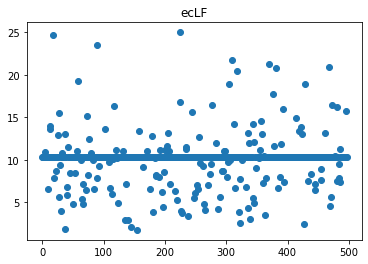

In [11]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

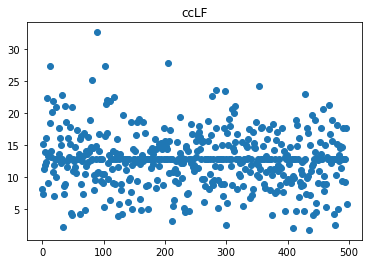

In [12]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

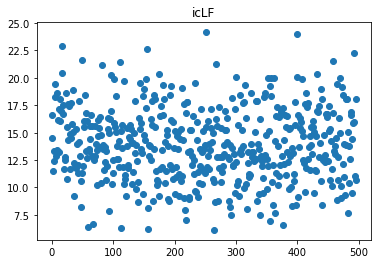

In [13]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

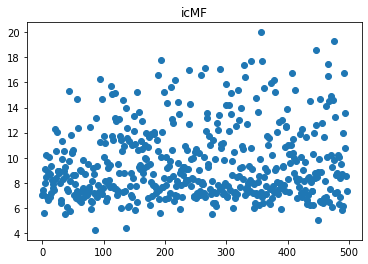

In [14]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

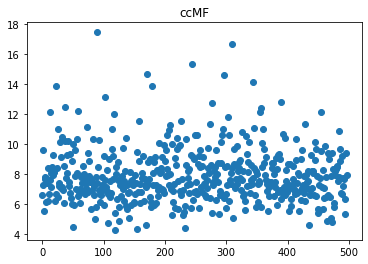

In [15]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

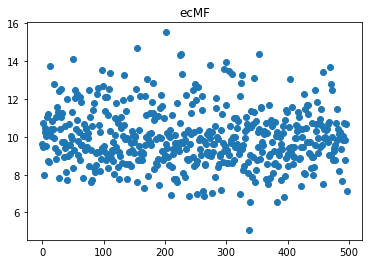

In [16]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

### Tibia

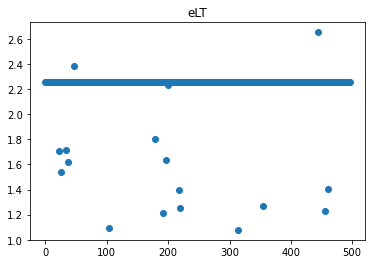

In [17]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

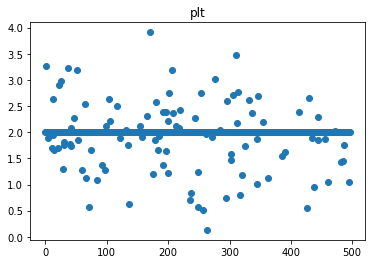

In [18]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

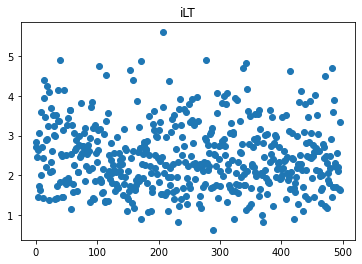

In [19]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

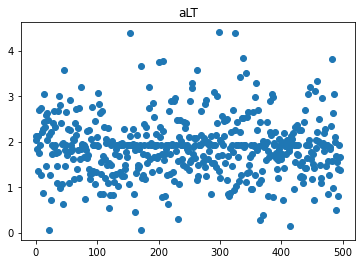

In [20]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

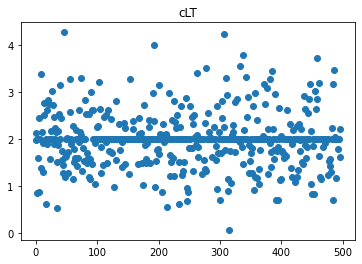

In [21]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

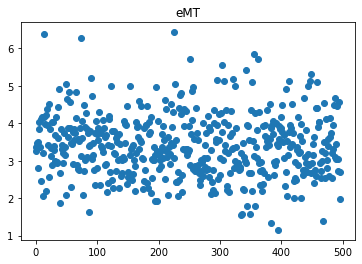

In [22]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

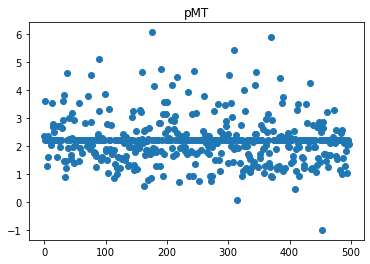

In [23]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

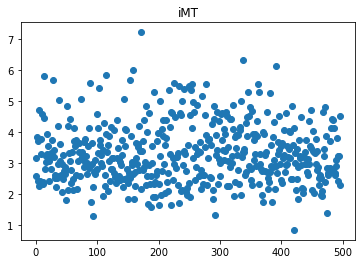

In [24]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

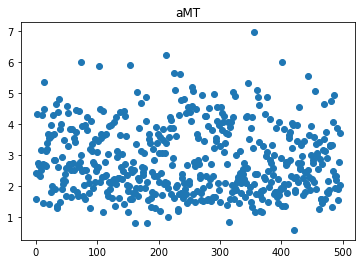

In [25]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

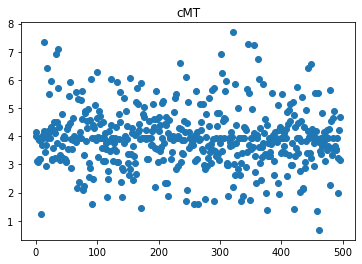

In [26]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Segmentation 9246518.0 is an outlier (0.59 total deviation from median)
Segmentation 9201046.0 is an outlier (3.77 total deviation from median)
Segmentation 9244698.0 is an outlier (3.33 total deviation from median)
Segmentation 9189303.0 is an outlier (3.70 total deviation from median)
Segmentation 9156694.0 is an outlier (14.44 total deviation from median)
Segmentation 9194012.0 is an outlier (2.48 total deviation from median)
Segmentation 9250129.0 is an outlier (1.65 total deviation from median)
Segmentation 9240925.0 is an outlier (2.59 total deviation from median)
Segmentation 9218935.0 is an outlier (5.16 total deviation from median)
Segmentation 9223980.0 is an outlier (4.67 total deviation from median)
Segmentation 9194860.0 is an outlier (0.91 total deviation from median)
Segmentation 9248932.0 is an outlier (6.30 total deviation from median)
Segmentation 9146462.0 is an outlier (0.50 total deviation from median)
Segmentation 9148828.0 is an outlier (2.73 total deviation from

Text(0.5, 1.0, 'ecLF')

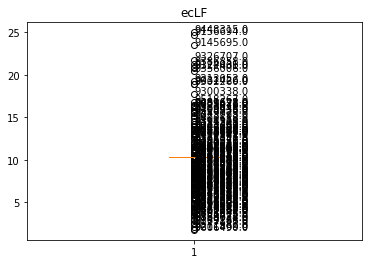

In [27]:
ys = eclf.to_numpy()
pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Segmentation 9186589.0 is an outlier (9.50 total deviation from median)
Segmentation 9189303.0 is an outlier (14.53 total deviation from median)
Segmentation 9156694.0 is an outlier (9.02 total deviation from median)
Segmentation 9146462.0 is an outlier (9.98 total deviation from median)
Segmentation 9211049.0 is an outlier (10.64 total deviation from median)
Segmentation 9209896.0 is an outlier (12.27 total deviation from median)
Segmentation 9145695.0 is an outlier (19.79 total deviation from median)
Segmentation 9707649.0 is an outlier (14.56 total deviation from median)
Segmentation 9603227.0 is an outlier (9.24 total deviation from median)
Segmentation 9867315.0 is an outlier (9.02 total deviation from median)
Segmentation 9659472.0 is an outlier (9.62 total deviation from median)
Segmentation 9478504.0 is an outlier (14.97 total deviation from median)
Segmentation 9518765.0 is an outlier (9.67 total deviation from median)
Segmentation 9481628.0 is an outlier (9.83 total deviation

Text(0.5, 1.0, 'ccLF')

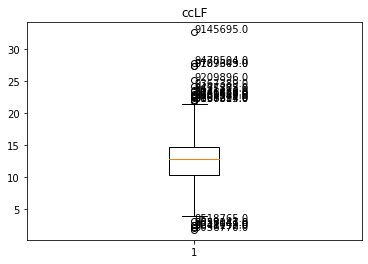

In [28]:
ys = cclf.to_numpy()
pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9534875.0 is an outlier (10.39 total deviation from median)
Segmentation 9012867.0 is an outlier (10.26 total deviation from median)


Text(0.5, 1.0, 'icLF')

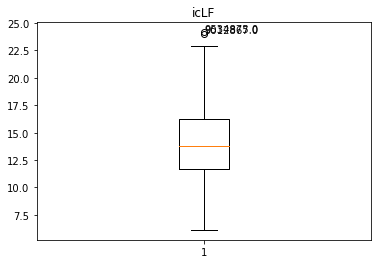

In [29]:
ys = iclf.to_numpy()
pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9653075.0 is an outlier (9.09 total deviation from median)
Segmentation 9457359.0 is an outlier (8.32 total deviation from median)
Segmentation 9440417.0 is an outlier (8.45 total deviation from median)
Segmentation 9504627.0 is an outlier (8.40 total deviation from median)
Segmentation 9355112.0 is an outlier (8.71 total deviation from median)
Segmentation 9341699.0 is an outlier (9.02 total deviation from median)
Segmentation 9324182.0 is an outlier (11.31 total deviation from median)
Segmentation 9355228.0 is an outlier (9.06 total deviation from median)
Segmentation 9035647.0 is an outlier (8.08 total deviation from median)
Segmentation 9017909.0 is an outlier (9.93 total deviation from median)
Segmentation 9036948.0 is an outlier (8.82 total deviation from median)
Segmentation 9070207.0 is an outlier (10.60 total deviation from median)
Segmentation 9141244.0 is an outlier (8.04 total deviation from median)


Text(0.5, 1.0, 'icMF')

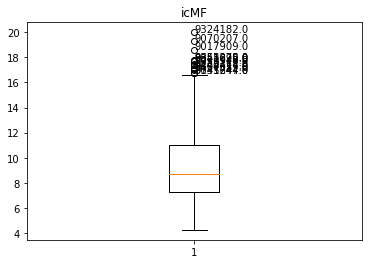

In [30]:
ys = icmf.to_numpy()
pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9189303.0 is an outlier (4.56 total deviation from median)
Segmentation 9250129.0 is an outlier (6.26 total deviation from median)
Segmentation 9148828.0 is an outlier (4.85 total deviation from median)
Segmentation 9212052.0 is an outlier (4.63 total deviation from median)
Segmentation 9145695.0 is an outlier (9.85 total deviation from median)
Segmentation 9707649.0 is an outlier (5.55 total deviation from median)
Segmentation 9659472.0 is an outlier (4.38 total deviation from median)
Segmentation 9686590.0 is an outlier (7.06 total deviation from median)
Segmentation 9884591.0 is an outlier (6.30 total deviation from median)
Segmentation 9409935.0 is an outlier (7.71 total deviation from median)
Segmentation 9481628.0 is an outlier (5.14 total deviation from median)
Segmentation 9414968.0 is an outlier (6.97 total deviation from median)
Segmentation 9326707.0 is an outlier (9.07 total deviation from median)
Segmentation 9311328.0 is an outlier (6.55 total deviation from 

Text(0.5, 1.0, 'ccMF')

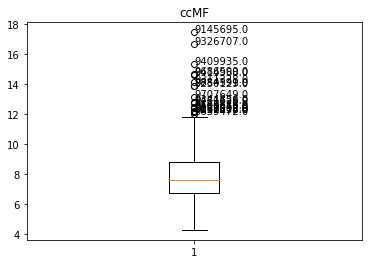

In [31]:
ys = ccmf.to_numpy()
pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Segmentation 9189303.0 is an outlier (3.91 total deviation from median)
Segmentation 9184588.0 is an outlier (4.26 total deviation from median)
Segmentation 9221040.0 is an outlier (3.67 total deviation from median)
Segmentation 9606490.0 is an outlier (4.84 total deviation from median)
Segmentation 9878765.0 is an outlier (5.68 total deviation from median)
Segmentation 9518267.0 is an outlier (4.48 total deviation from median)
Segmentation 9476283.0 is an outlier (4.54 total deviation from median)
Segmentation 9409550.0 is an outlier (3.97 total deviation from median)
Segmentation 9414968.0 is an outlier (3.73 total deviation from median)
Segmentation 9539141.0 is an outlier (4.10 total deviation from median)
Segmentation 9302260.0 is an outlier (3.64 total deviation from median)
Segmentation 9395979.0 is an outlier (4.78 total deviation from median)
Segmentation 9371094.0 is an outlier (4.52 total deviation from median)
Segmentation 9115742.0 is an outlier (3.56 total deviation from 

Text(0.5, 1.0, 'ecMF')

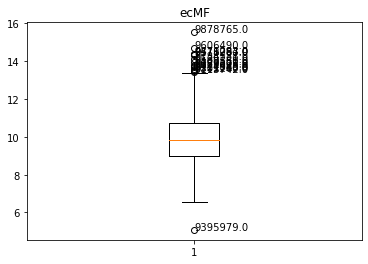

In [32]:
ys = ecmf.to_numpy()
pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

### Tibia

Segmentation 9250129.0 is an outlier (0.55 total deviation from median)
Segmentation 9240925.0 is an outlier (0.72 total deviation from median)
Segmentation 9146462.0 is an outlier (0.54 total deviation from median)
Segmentation 9148828.0 is an outlier (0.64 total deviation from median)
Segmentation 9223789.0 is an outlier (0.13 total deviation from median)
Segmentation 9707649.0 is an outlier (1.17 total deviation from median)
Segmentation 9884591.0 is an outlier (0.45 total deviation from median)
Segmentation 9833782.0 is an outlier (1.04 total deviation from median)
Segmentation 9598683.0 is an outlier (0.63 total deviation from median)
Segmentation 9566781.0 is an outlier (0.03 total deviation from median)
Segmentation 9467311.0 is an outlier (0.86 total deviation from median)
Segmentation 9456548.0 is an outlier (1.00 total deviation from median)
Segmentation 9401202.0 is an outlier (1.18 total deviation from median)
Segmentation 9291078.0 is an outlier (0.99 total deviation from 

Text(0.5, 1.0, 'eLT')

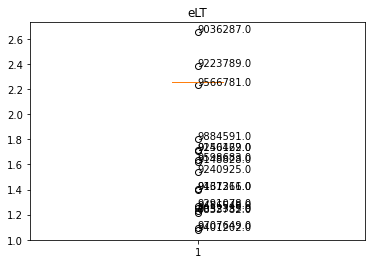

In [33]:
ys = elt.to_numpy()
pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9211751.0 is an outlier (1.27 total deviation from median)
Segmentation 9246518.0 is an outlier (0.12 total deviation from median)
Segmentation 9201046.0 is an outlier (0.30 total deviation from median)
Segmentation 9244698.0 is an outlier (0.07 total deviation from median)
Segmentation 9189303.0 is an outlier (0.62 total deviation from median)
Segmentation 9154793.0 is an outlier (0.35 total deviation from median)
Segmentation 9194012.0 is an outlier (0.31 total deviation from median)
Segmentation 9250129.0 is an outlier (0.90 total deviation from median)
Segmentation 9240925.0 is an outlier (0.97 total deviation from median)
Segmentation 9194860.0 is an outlier (0.70 total deviation from median)
Segmentation 9146898.0 is an outlier (0.25 total deviation from median)
Segmentation 9248932.0 is an outlier (0.18 total deviation from median)
Segmentation 9148828.0 is an outlier (1.23 total deviation from median)
Segmentation 9162299.0 is an outlier (0.23 total deviation from 

Text(0.5, 1.0, 'pLT')

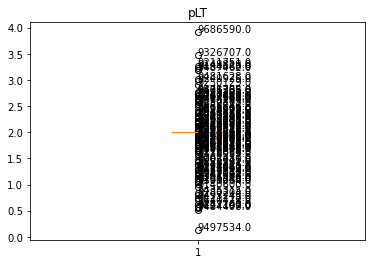

In [34]:
ys = plt.to_numpy()
pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9162299.0 is an outlier (2.57 total deviation from median)
Segmentation 9707649.0 is an outlier (2.42 total deviation from median)
Segmentation 9686590.0 is an outlier (2.52 total deviation from median)
Segmentation 9487462.0 is an outlier (3.26 total deviation from median)
Segmentation 9481628.0 is an outlier (2.57 total deviation from median)
Segmentation 9311328.0 is an outlier (2.47 total deviation from median)


Text(0.5, 1.0, 'iLT')

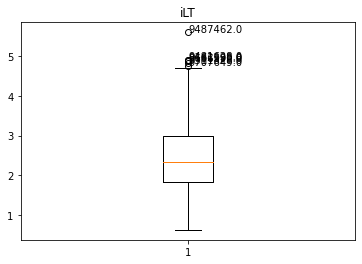

In [35]:
ys = ilt.to_numpy()
pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9266394.0 is an outlier (1.86 total deviation from median)
Segmentation 9223789.0 is an outlier (1.66 total deviation from median)
Segmentation 9249025.0 is an outlier (1.28 total deviation from median)
Segmentation 9606490.0 is an outlier (2.47 total deviation from median)
Segmentation 9781749.0 is an outlier (1.48 total deviation from median)
Segmentation 9686590.0 is an outlier (1.73 total deviation from median)
Segmentation 9581253.0 is an outlier (1.86 total deviation from median)
Segmentation 9833489.0 is an outlier (1.27 total deviation from median)
Segmentation 9566781.0 is an outlier (1.84 total deviation from median)
Segmentation 9487462.0 is an outlier (1.85 total deviation from median)
Segmentation 9421281.0 is an outlier (1.62 total deviation from median)
Segmentation 9471287.0 is an outlier (1.36 total deviation from median)
Segmentation 9410941.0 is an outlier (1.27 total deviation from median)
Segmentation 9494867.0 is an outlier (1.65 total deviation from 

Text(0.5, 1.0, 'aLT')

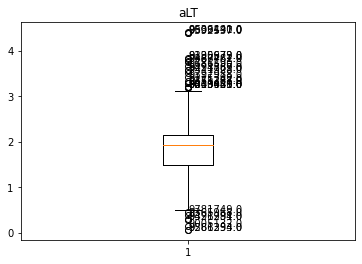

In [36]:
ys = alt.to_numpy()
pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Segmentation 9230284.0 is an outlier (1.15 total deviation from median)
Segmentation 9197994.0 is an outlier (1.12 total deviation from median)
Segmentation 9186589.0 is an outlier (1.38 total deviation from median)
Segmentation 9156694.0 is an outlier (1.38 total deviation from median)
Segmentation 9194012.0 is an outlier (0.84 total deviation from median)
Segmentation 9218935.0 is an outlier (1.02 total deviation from median)
Segmentation 9211049.0 is an outlier (1.47 total deviation from median)
Segmentation 9162299.0 is an outlier (1.16 total deviation from median)
Segmentation 9223789.0 is an outlier (2.28 total deviation from median)
Segmentation 9180558.0 is an outlier (1.29 total deviation from median)
Segmentation 9249025.0 is an outlier (1.30 total deviation from median)
Segmentation 9220441.0 is an outlier (0.82 total deviation from median)
Segmentation 9145695.0 is an outlier (1.00 total deviation from median)
Segmentation 9166468.0 is an outlier (0.95 total deviation from 

Text(0.5, 1.0, 'cLT')

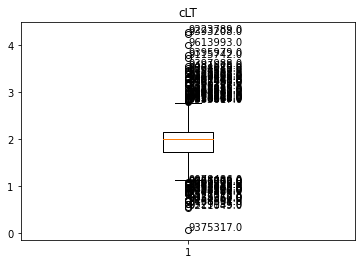

In [37]:
ys = clt.to_numpy()
pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9154793.0 is an outlier (3.01 total deviation from median)
Segmentation 9249025.0 is an outlier (2.89 total deviation from median)
Segmentation 9518267.0 is an outlier (3.06 total deviation from median)
Segmentation 9534875.0 is an outlier (2.34 total deviation from median)
Segmentation 9302260.0 is an outlier (2.19 total deviation from median)
Segmentation 9291078.0 is an outlier (2.48 total deviation from median)
Segmentation 9388068.0 is an outlier (2.34 total deviation from median)
Segmentation 9319367.0 is an outlier (2.23 total deviation from median)


Text(0.5, 1.0, 'eMT')

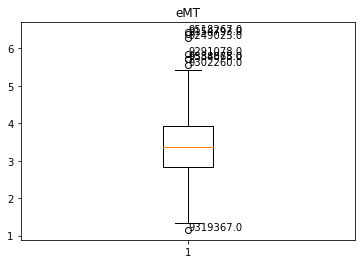

In [38]:
ys = emt.to_numpy()
pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9211751.0 is an outlier (1.41 total deviation from median)
Segmentation 9189303.0 is an outlier (1.32 total deviation from median)
Segmentation 9248932.0 is an outlier (1.41 total deviation from median)
Segmentation 9146462.0 is an outlier (1.60 total deviation from median)
Segmentation 9211049.0 is an outlier (1.31 total deviation from median)
Segmentation 9148828.0 is an outlier (2.41 total deviation from median)
Segmentation 9223789.0 is an outlier (0.98 total deviation from median)
Segmentation 9197466.0 is an outlier (1.34 total deviation from median)
Segmentation 9211547.0 is an outlier (1.58 total deviation from median)
Segmentation 9184790.0 is an outlier (2.33 total deviation from median)
Segmentation 9152295.0 is an outlier (1.05 total deviation from median)
Segmentation 9145695.0 is an outlier (2.91 total deviation from median)
Segmentation 9179589.0 is an outlier (1.66 total deviation from median)
Segmentation 9899098.0 is an outlier (1.11 total deviation from 

Text(0.5, 1.0, 'pMT')

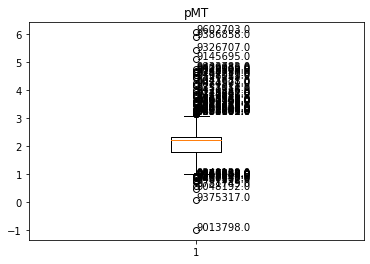

In [39]:
ys = pmt.to_numpy()
pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9154793.0 is an outlier (2.64 total deviation from median)
Segmentation 9817241.0 is an outlier (2.65 total deviation from median)
Segmentation 9987407.0 is an outlier (2.81 total deviation from median)
Segmentation 9686590.0 is an outlier (4.04 total deviation from median)
Segmentation 9395979.0 is an outlier (3.15 total deviation from median)
Segmentation 9323079.0 is an outlier (2.96 total deviation from median)


Text(0.5, 1.0, 'iMT')

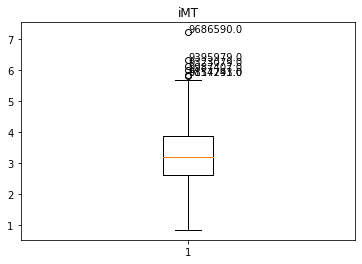

In [40]:
ys = imt.to_numpy()
pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9458093.0 is an outlier (3.59 total deviation from median)
Segmentation 9291078.0 is an outlier (4.33 total deviation from median)


Text(0.5, 1.0, 'aMT')

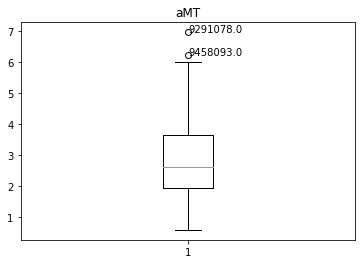

In [41]:
ys = amt.to_numpy()
pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Segmentation 9186589.0 is an outlier (2.72 total deviation from median)
Segmentation 9154793.0 is an outlier (3.41 total deviation from median)
Segmentation 9238060.0 is an outlier (2.48 total deviation from median)
Segmentation 9146462.0 is an outlier (2.98 total deviation from median)
Segmentation 9148828.0 is an outlier (3.14 total deviation from median)
Segmentation 9145695.0 is an outlier (2.09 total deviation from median)
Segmentation 9241424.0 is an outlier (2.33 total deviation from median)
Segmentation 9269275.0 is an outlier (2.33 total deviation from median)
Segmentation 9614934.0 is an outlier (2.07 total deviation from median)
Segmentation 9606490.0 is an outlier (2.13 total deviation from median)
Segmentation 9581253.0 is an outlier (2.51 total deviation from median)
Segmentation 9411118.0 is an outlier (2.66 total deviation from median)
Segmentation 9409935.0 is an outlier (2.18 total deviation from median)
Segmentation 9460287.0 is an outlier (2.24 total deviation from 

Text(0.5, 1.0, 'cMT')

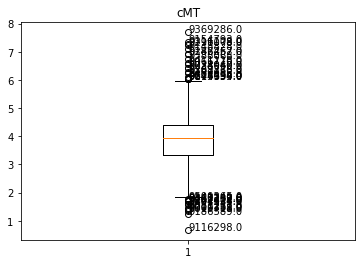

In [42]:
ys = cmt.to_numpy()
pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')